In [18]:
import optuna
import time
import matlab
import matlab.engine
# import neptune.new.integrations.optuna as optuna_utils


# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
# import neptune.new as neptune

# NEPTUNE_API_TOKEN="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzOTczZGExYS05NjlmLTQzZjMtYTllNC03OGMwYjVhMjBiMTAifQ=="

# run=neptune.init_run(api_token=NEPTUNE_API_TOKEN,project='xushengyichn/example-project-tensorflow-keras')

# neptune_callback = optuna_utils.NeptuneCallback(run)

In [19]:
eng = matlab.engine.start_matlab()

mode_numbers=matlab.double([1,2,3])
numberofTMD=3.
mass_six_span = 10007779.7
mu=0.02
calmodes_all=3.

def objective(trial):
    mTMD1 = trial.suggest_float("mTMD1", 0.001*mass_six_span, 0.015*mass_six_span)
    mTMD2 = trial.suggest_float("mTMD2", 0.001*mass_six_span, 0.015*mass_six_span)
    zetaTMD1 = trial.suggest_float("zetaTMD1", 0.05, 0.25)
    zetaTMD2 = trial.suggest_float("zetaTMD2", 0.05, 0.25)
    zetaTMD3 = trial.suggest_float("zetaTMD3", 0.05, 0.25)
    fTMD1 = trial.suggest_float("fTMD1", 0.7, 1.2)
    fTMD2 = trial.suggest_float("fTMD2", 0.7, 1.2)
    fTMD3 = trial.suggest_float("fTMD3", 0.7, 1.2)
    xTMD1 = trial.suggest_float("xTMD1", 0, 660)
    xTMD2 = trial.suggest_float("xTMD2", 0, 660)
    xTMD3 = trial.suggest_float("xTMD3", 0, 660)
    min_damping=eng.Optim_Damping_for_n_foces_n_modes_bayesopt(mode_numbers,numberofTMD,mTMD1,mTMD2,zetaTMD1,zetaTMD2,zetaTMD3,fTMD1,fTMD2,fTMD3,xTMD1,xTMD2,xTMD3,calmodes_all,mu)
    return min_damping


sampler = optuna.samplers.CmaEsSampler(
        restart_strategy="ipop",
        inc_popsize=2,
)
# sampler = optuna.samplers.TPESampler()
# sampler = optuna.samplers.RandomSampler()
study = optuna.create_study(direction='minimize',sampler=sampler)

study.enqueue_trial(
    {
        "mTMD1": 4.398765774297018e+04,
        "mTMD2": 1.499091564993456e+05,
        "zetaTMD1": 0.104498193055940,
        "zetaTMD2": 0.103949188960418,
        "zetaTMD3": 0.163812273910551,
        "fTMD1": 0.845490166926995,
        "fTMD2": 0.915368425411861,
        "fTMD3": 0.909499605989310,
        "xTMD1": 5.038433489290784e+02,
        "xTMD2": 50.246769890623185,
        "xTMD3": 19.388073150405320,
    }
)


# import logging
# import sys

# Add stream handler of stdout to show the messages to see Optuna works expectedly.
# optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

study.optimize(objective, n_trials=10000199) 
 
print(study.best_params)
print(study.best_value)
# run.stop()

c:\Users\xushe\anaconda3\lib\site-packages\optuna\samplers\_cmaes.py:225: ExperimentalWarning:

`restart_strategy` option is an experimental feature. The interface can change in the future.

[I 2022-11-07 20:14:55,254] A new study created in memory with name: no-name-c026e51f-809a-4a61-be5c-c590f17cc438
[I 2022-11-07 20:14:59,661] Trial 0 finished with value: -0.004275958482997594 and parameters: {'mTMD1': 43987.65774297018, 'mTMD2': 149909.1564993456, 'zetaTMD1': 0.10449819305594, 'zetaTMD2': 0.103949188960418, 'zetaTMD3': 0.163812273910551, 'fTMD1': 0.845490166926995, 'fTMD2': 0.915368425411861, 'fTMD3': 0.90949960598931, 'xTMD1': 503.8433489290784, 'xTMD2': 50.246769890623185, 'xTMD3': 19.38807315040532}. Best is trial 0 with value: -0.004275958482997594.
[I 2022-11-07 20:15:00,477] Trial 1 finished with value: 0.0746777648921089 and parameters: {'mTMD1': 80062.19679651795, 'mTMD2': 80062.26895880414, 'zetaTMD1': 0.08812775752103211, 'zetaTMD2': 0.06054179022281411, 'zetaTMD3': 0.13

{'mTMD1': 43987.65774297018, 'mTMD2': 149909.1564993456, 'zetaTMD1': 0.10449819305594, 'zetaTMD2': 0.103949188960418, 'zetaTMD3': 0.163812273910551, 'fTMD1': 0.845490166926995, 'fTMD2': 0.915368425411861, 'fTMD3': 0.90949960598931, 'xTMD1': 503.8433489290784, 'xTMD2': 50.246769890623185, 'xTMD3': 19.38807315040532}
-0.004275958482997594


In [20]:
print(study.best_params)
print(study.best_value)

{'mTMD1': 43987.65774297018, 'mTMD2': 149909.1564993456, 'zetaTMD1': 0.10449819305594, 'zetaTMD2': 0.103949188960418, 'zetaTMD3': 0.163812273910551, 'fTMD1': 0.845490166926995, 'fTMD2': 0.915368425411861, 'fTMD3': 0.90949960598931, 'xTMD1': 503.8433489290784, 'xTMD2': 50.246769890623185, 'xTMD3': 19.38807315040532}
-0.004275958482997594


C:\Users\xushe\AppData\Local\Temp\ipykernel_34748\1050266518.py:1: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.

[W 2022-11-07 21:26:03,947] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<AxesSubplot:ylabel='fTMD1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='fTMD2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='fTMD3'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='mTMD1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='mTMD2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='xTMD1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]

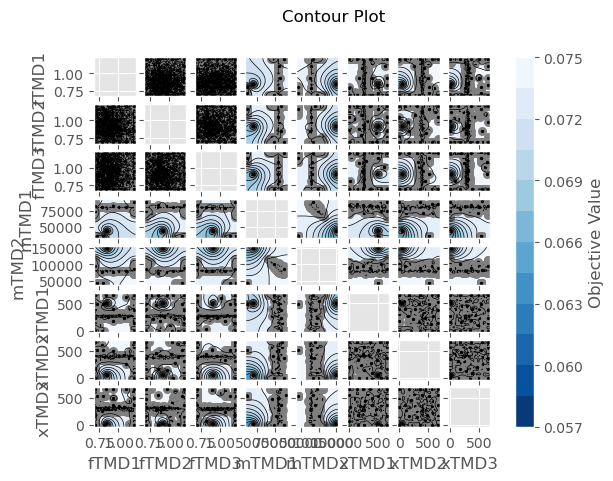

In [21]:
optuna.visualization.matplotlib.plot_contour(study, params=['mTMD1','mTMD2','fTMD1','fTMD2','fTMD3', 'xTMD1', 'xTMD2', 'xTMD3'])

C:\Users\xushe\AppData\Local\Temp\ipykernel_34748\1036994904.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

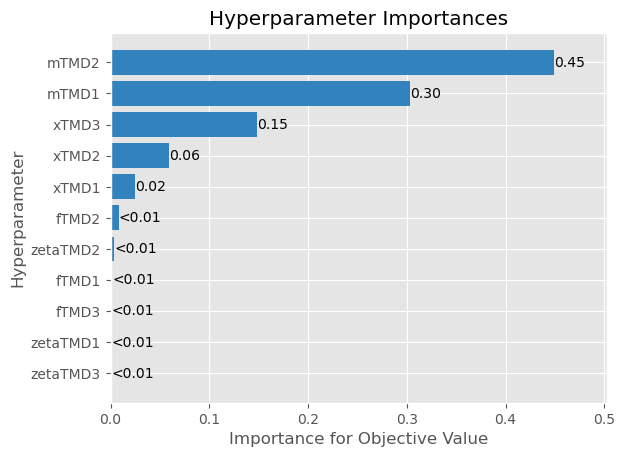

In [22]:
optuna.visualization.matplotlib.plot_param_importances(study)